#Housing Analysis

## Overview

This project analyzes the housing data from houses old in King County for 2014 and 2015 and creates a model to predict sale price based on various variables.  

Business Problem: 

Real estate company interested in current trends in what affects housing sales, in order to make recommndations to clients? 

A real estate company is interested in current trends affecting housing sales, particularly among middle class homes.  





# Data Understanding

This section focuses on exploring the data from King County House Sales for 2014 and 2015.  The data includes a multitude of variables, including data sold, price, bedrooms, bathrooms, square footage of living area, lot, basement, above area, as well as average square foot information for neighboring areas, grade, condition, renovation year, views, location, and waterfront.  

The data is extensive, and has various possible predictors available for price.  

In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

In [350]:
df = pd.read_csv('data/kc_house_data.csv')

In [86]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [87]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#Data Preparation 

I convert the date into datetime format. I also drop an entry that seems to be entered wrong, as it has 33 bedrooms but none of it's other attibutes make that feasible.    

I drop the top 10% most expensive houses in order to focus on middle class and lower homes. This will also help improve reliability of the model as it won't have as many outliers. 

In [352]:
from datetime import datetime
df["date"]=pd.DatetimeIndex(df["date"]).year
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,1970,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,1970,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,1970,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,1970,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,1970,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [92]:
df.nlargest(10, 'bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8748,1773100755,2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
19239,8812401450,2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
4092,1997200215,2014,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
4231,2902200015,2015,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,...,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
6073,9822700190,2014,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,...,8,2530,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000
8537,424049043,2014,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,...,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
16830,8823900290,2015,1400000.0,9,4.00,4620,5508,2.5,0.0,0.0,...,11,3870,750.0,1915,0.0,98105,47.6684,-122.309,2710,4320


In [353]:
df = df.drop([15856])  #dropping entry with 33 bedrooms but only 1.75 baths, 1 floor, and 1620 sqft

In [354]:
#cutting out the top 10% most expensve homes, to focus on more middle class and lower homes.  
df = df[(df['price'] < np.quantile(df['price'], 0.9))]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19435 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19435 non-null  int64  
 1   date           19435 non-null  int64  
 2   price          19435 non-null  float64
 3   bedrooms       19435 non-null  int64  
 4   bathrooms      19435 non-null  float64
 5   sqft_living    19435 non-null  int64  
 6   sqft_lot       19435 non-null  int64  
 7   floors         19435 non-null  float64
 8   waterfront     17283 non-null  float64
 9   view           19378 non-null  float64
 10  condition      19435 non-null  int64  
 11  grade          19435 non-null  int64  
 12  sqft_above     19435 non-null  int64  
 13  sqft_basement  19435 non-null  object 
 14  yr_built       19435 non-null  int64  
 15  yr_renovated   15977 non-null  float64
 16  zipcode        19435 non-null  int64  
 17  lat            19435 non-null  float64
 18  long  

In [334]:
df=df.drop_duplicates('id')


Waterfront, View, and Year Renovated all have null values. I replace the missing values with 0, as it's the null of each set. 

In [97]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2130
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3422
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [98]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.926800e+04,19268.000000,19268.000000,19268.000000,19268.000000,19268.000000,1.926800e+04,19268.000000,17138.000000,19211.000000,19268.000000,19268.000000,19268.000000,19268.000000,15846.000000,19268.000000,19268.000000,19268.000000,19268.000000,19268.000000
mean,4.619250e+09,2014.318092,450973.118123,3.300291,2.017036,1917.373573,1.420249e+04,1.463073,0.002334,0.147936,3.405335,7.456301,1660.429001,1970.739724,68.861732,98078.761781,47.553730,-122.213403,1881.096793,12228.335894
std,2.877850e+09,0.465748,177634.836437,0.875036,0.688563,721.411269,3.867682e+04,0.536007,0.048256,0.587727,0.644307,0.967747,679.760108,29.006717,364.204272,53.290667,0.143059,0.143001,574.108831,25712.490700
min,1.000102e+06,2014.000000,78000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.143701e+09,2014.000000,310000.000000,3.000000,1.500000,1380.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,1951.000000,0.000000,98033.000000,47.452200,-122.331000,1460.000000,5020.750000
50%,3.922150e+09,2014.000000,425000.000000,3.000000,2.000000,1820.000000,7.480000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1480.000000,1974.000000,0.000000,98065.000000,47.562800,-122.235000,1770.000000,7500.000000
75%,7.345383e+09,2015.000000,572000.000000,4.000000,2.500000,2360.000000,1.016000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2030.250000,1996.000000,0.000000,98118.000000,47.680600,-122.123000,2220.250000,9752.000000
max,9.900000e+09,2015.000000,886000.000000,11.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5450.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4670.000000,560617.000000


In [355]:
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

I drop year renovated as most houses were not renovated at all.  I then plot histograms of the remaining data. I change zipcode into string in order to treat it as a categorical value. I also create a column for age of the house when it was sold. 

In [356]:
df = df.drop(['yr_renovated'], axis=1)

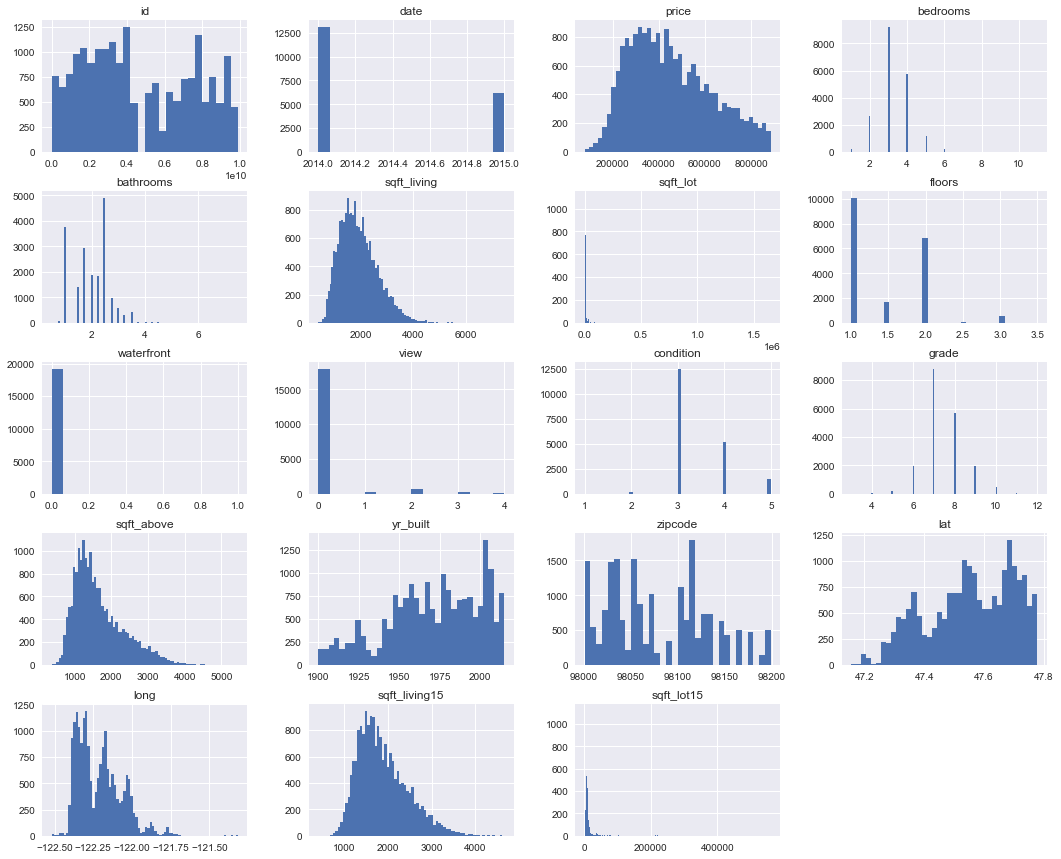

In [337]:
df.hist(figsize=(18,15), bins='auto');


In [357]:

df['zipcode']=df['zipcode'].astype('str')
df['waterfront'] = df['waterfront'].astype('str')


In [181]:
len(df[df['sqft_basement'] == '?'])
#414 unknown values
#df[df['sqft_basement'] == '?'] = '0.0'
df['sqft_basement'].replace({"?": "0.0"}, inplace=True)
len(df[df['sqft_basement'] == '?'])
#replacing witht 0 as most common entry
#recasting as numereic 
df['sqft_basement'] = df['sqft_basement'].astype(float)


In [358]:
df['age']=df['date']-df['yr_built']


In [359]:
df2 = df

#Check the elinearity assumption for chohsen features with target variable using scatter plots 

## Linearity

I check the linearity assumption for the chosen features against the target variable (price) using scatter plots. 

Most variables show at least a bit of a linear relationship. 

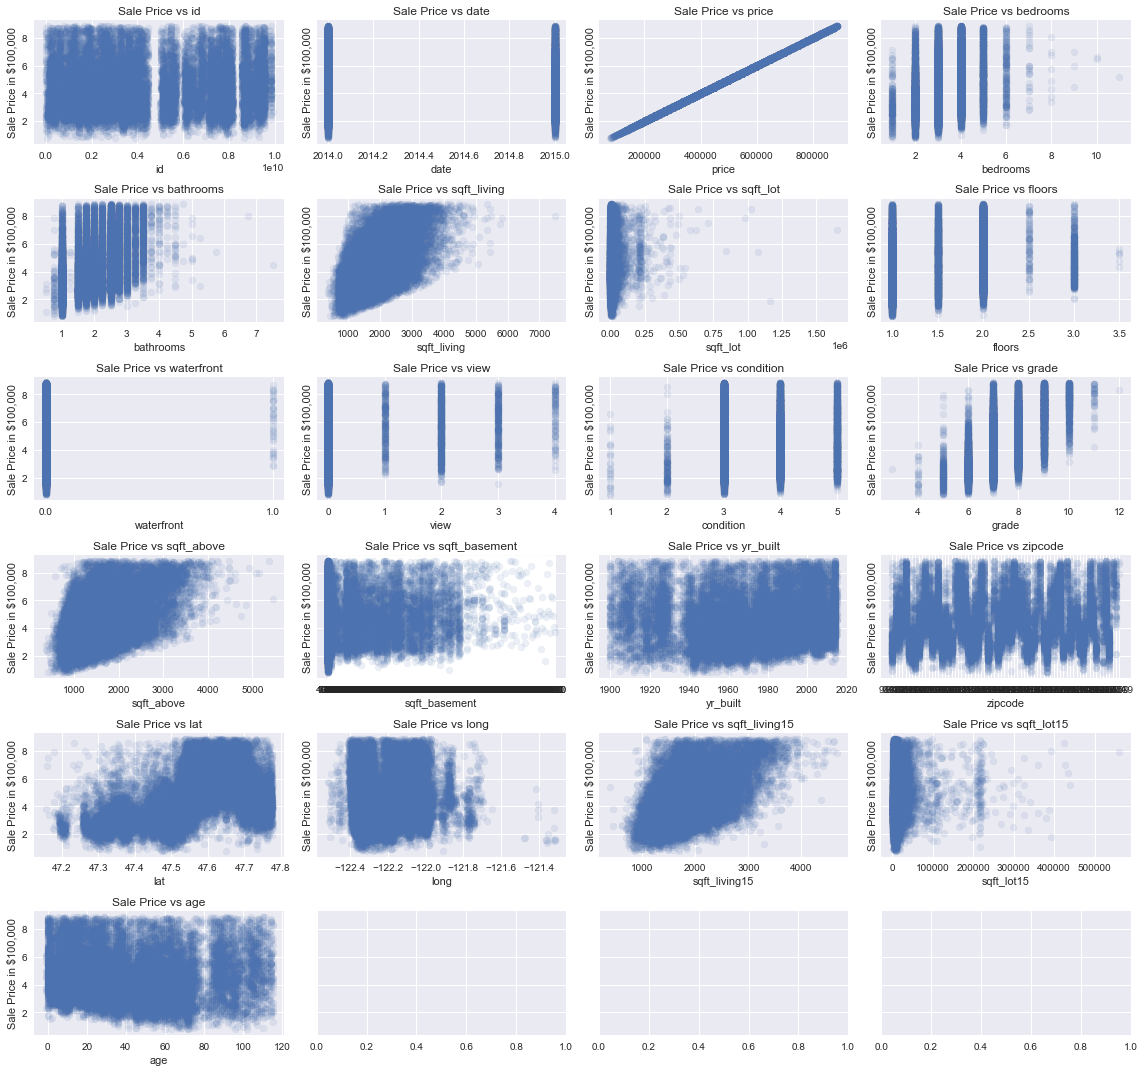

In [341]:

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()



## Correality 

I check correleation between the values, and delete one of those among pairs that are highly correlated (r > .71).  I drop the values of sqft_living15, sqft_lot15, and sqft_above.  I also drop the values of year built, id, and date sold as not necessary for the model. 

In [360]:
feats = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
         'grade', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age']
corr = df[feats].corr()
corr

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,age
date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.000000,0.495783,0.606815,0.022094,0.150220,0.022371,0.309779,0.475694,0.168263,-0.049085,0.146169,0.373602,0.020105,-0.168263
bathrooms,NaN,0.495783,1.000000,0.701392,0.051172,0.501126,-0.139151,0.593710,0.621276,0.560186,-0.031578,0.251444,0.511111,0.052048,-0.560186
sqft_living,NaN,0.606815,0.701392,1.000000,0.147447,0.325328,-0.073131,0.669949,0.841080,0.359014,-0.023097,0.291125,0.719765,0.163031,-0.359014
sqft_lot,NaN,0.022094,0.051172,0.147447,1.000000,-0.025099,0.002161,0.077121,0.151118,0.033644,-0.101641,0.219712,0.142885,0.708450,-0.033644
floors,NaN,0.150220,0.501126,0.325328,-0.025099,1.000000,-0.279984,0.452698,0.524686,0.522039,0.024744,0.136649,0.259459,-0.029691,-0.522039
condition,NaN,0.022371,-0.139151,-0.073131,0.002161,-0.279984,1.000000,-0.177924,-0.179131,-0.348136,-0.019285,-0.093411,-0.126964,0.007469,0.348136
grade,NaN,0.309779,0.593710,0.669949,0.077121,0.452698,-0.177924,1.000000,0.677306,0.510665,0.059355,0.231097,0.642773,0.089967,-0.510665
sqft_above,NaN,0.475694,0.621276,0.841080,0.151118,0.524686,-0.179131,0.677306,1.000000,0.468385,-0.080607,0.395803,0.699509,0.168043,-0.468385
yr_built,NaN,0.168263,0.560186,0.359014,0.033644,0.522039,-0.348136,0.510665,0.468385,1.000000,-0.161660,0.404054,0.372639,0.054515,-1.000000


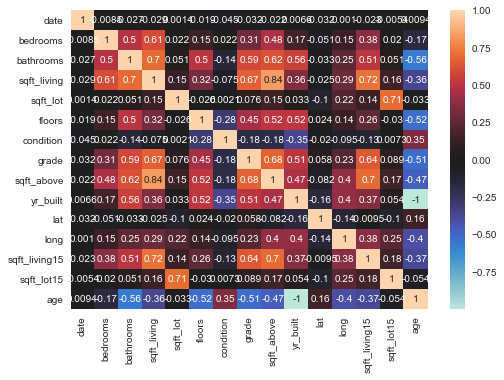

In [343]:
sns.heatmap(corr, center=0, annot=True);

In [361]:
#overlyhigh pairwise-correlation (r > .71) = sqft_living with sqft_above; sqft_lving with sqft_livingn15
#sqft_lot witht sqft_lot15, sqft_abovewithsqft_livingn15, sqft_lot witih hsqft_lot15

#get rid of sqft_living15 and sqft_lot15, sqft_above

df = df.drop(['sqft_living15'], axis=1)
df = df.drop(['sqft_lot15'], axis=1)
df = df.drop(['sqft_above'], axis=1)
df = df.drop(['yr_built'], axis=1)
df = df.drop(['id'], axis=1)
df = df.drop(['date'], axis=1)

In [362]:
feats = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
         'grade', 'zipcode', 'lat', 'long', 'age']
corr = df[feats].corr()

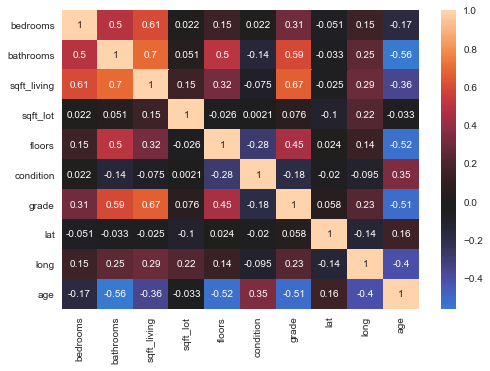

In [346]:
sns.heatmap(corr, center=0, annot=True);

## Normalizing the Data

I plot histograms to check normality of the data, as having more normally distributed data will be helpful for the model. I then apply the logarithmic function to sqft_living and sqft_lot to make the distrubitution appear more normal. I then scale the data so that it has similar magnitudes. 
    


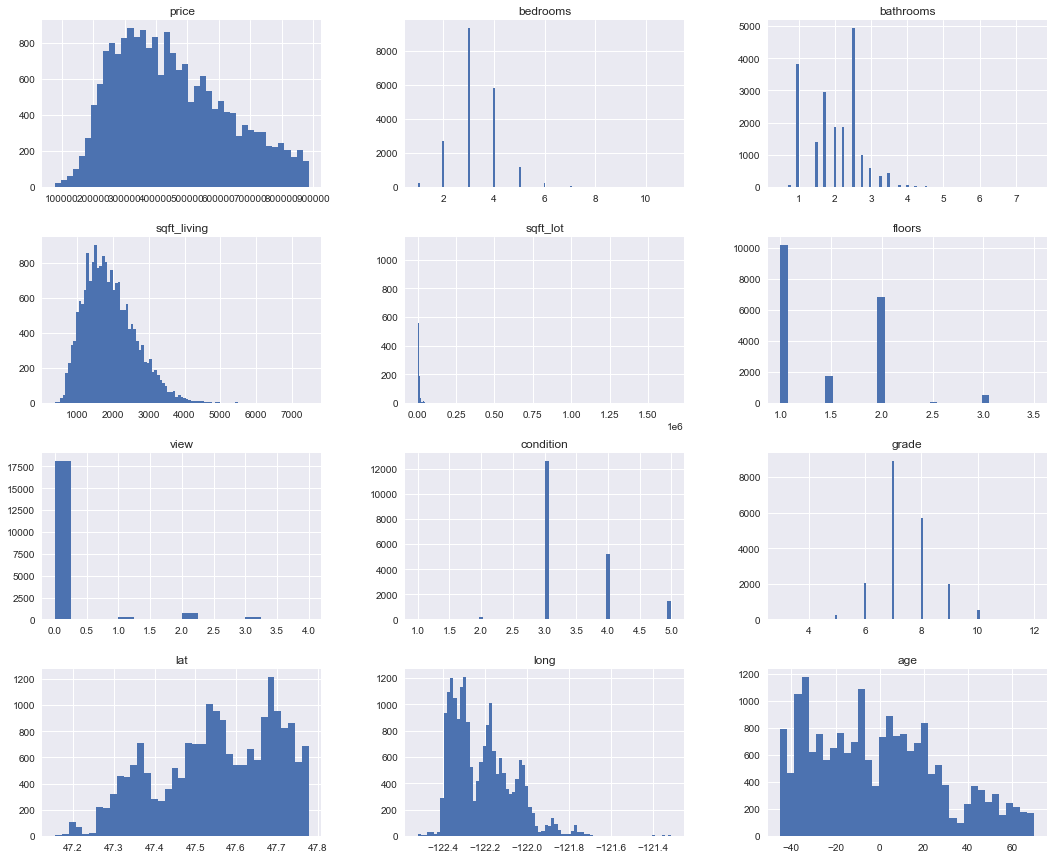

In [363]:
df.hist(figsize=(18,15), bins='auto');



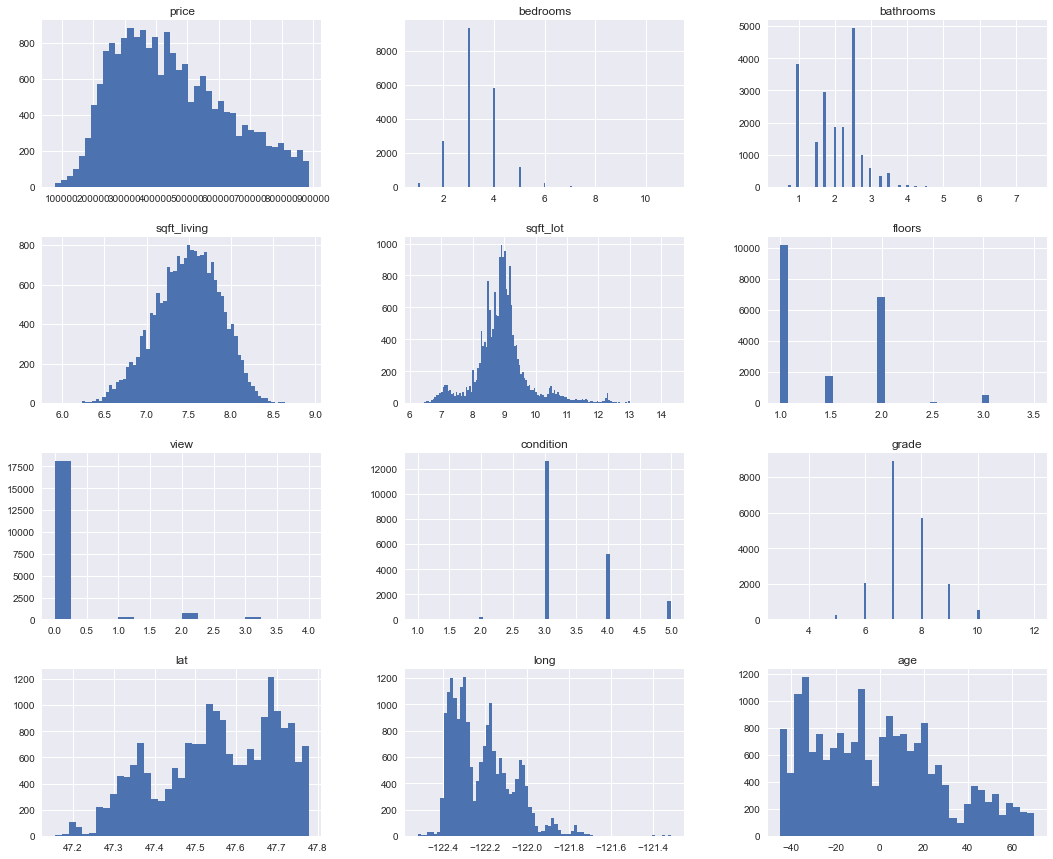

In [364]:
non_normal = ['sqft_living', 'sqft_lot']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))
    
df.hist(figsize=(18,15), bins='auto');


In [365]:
#scaling
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
             'condition', 'grade', 'age', 'lat', 'long']:
    df[feat] = norm_feat(df[feat])
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,lat,long,age
count,1.943500e+04,1.943500e+04,1.943500e+04,1.943500e+04,1.943500e+04,1.943500e+04,1.943500e+04,1.943500e+04,1.943500e+04,1.943500e+04,1.943500e+04,1.943500e+04
mean,-2.417013e-16,-1.003765e-15,-9.424357e-15,2.226602e-13,-7.068410e-16,1.513799e-14,-2.469928e-15,-1.392231e-14,3.484661e-15,-4.415579e-13,-1.389539e-12,3.897143e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.098738e+00,-2.624137e+00,-2.198007e+00,-4.092118e+00,-3.029784e+00,-8.613861e-01,-2.505331e-01,-3.728491e+00,-4.593961e+00,-2.781395e+00,-2.136365e+00,-1.529795e+00
25%,-7.927700e-01,-3.422532e-01,-7.470158e-01,-6.857036e-01,-4.824590e-01,-8.613861e-01,-2.505331e-01,-6.268015e-01,-4.661925e-01,-7.093918e-01,-8.210639e-01,-8.401073e-01
50%,-1.454151e-01,-3.422532e-01,-2.152036e-02,5.338193e-02,-2.882884e-02,-8.613861e-01,-2.505331e-01,-6.268015e-01,-4.661925e-01,6.122828e-02,-1.564169e-01,-1.159356e-01
75%,6.792589e-01,7.986887e-01,7.039751e-01,7.294931e-01,3.155148e-01,1.005991e+00,-2.505331e-01,9.240434e-01,5.657495e-01,8.874420e-01,6.341632e-01,6.772049e-01
max,2.449634e+00,8.785283e+00,7.958929e+00,3.731290e+00,6.045111e+00,3.807058e+00,6.578515e+00,2.474888e+00,4.693518e+00,1.566105e+00,6.287161e+00,2.435908e+00


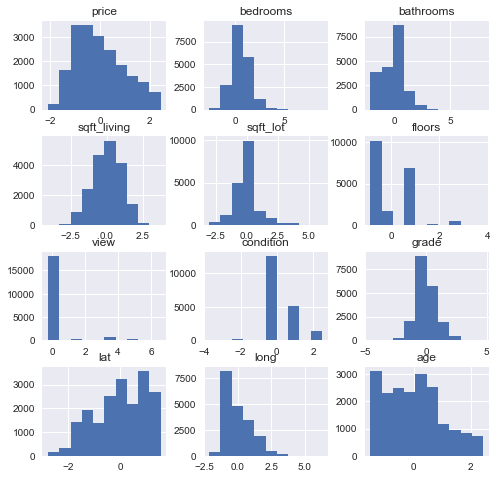

In [366]:
df.hist(figsize = [8,8]);


In [126]:
#next step: one-hot encodng categorical columns

In [368]:
#create dummy variables for the categorical features

#dummies = pd.get_dummies(df[categoricals], prefix=categoricals, drop_first=True
categoricals = ['zipcode', 'waterfront']
dummies = pd.get_dummies(df[categoricals], prefix=categoricals, drop_first=True)
df_preprocessed = df.drop(categoricals, axis=1)

df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)
df_preprocessed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1.0
0,-1.288700,-0.342253,-1.472511,-1.074199,-0.344908,-0.861386,-0.250533,-0.626801,-0.466192,0.0,...,0,0,0,0,0,1,0,0,0,0
1,0.490682,-0.342253,0.341227,0.951314,-0.065522,1.005991,-0.250533,-0.626801,-0.466192,400.0,...,0,0,0,0,0,0,0,0,0,0
2,-1.524563,-1.483195,-1.472511,-2.185015,0.297650,-0.861386,-0.250533,-0.626801,-1.498134,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.862207,0.798689,1.429470,0.246224,-0.482459,-0.861386,-0.250533,2.474888,-0.466192,910.0,...,0,0,0,0,0,0,0,0,0,0
4,0.333065,-0.342253,-0.021520,-0.154903,0.057710,-0.861386,-0.250533,-0.626801,0.565750,0.0,...,0,0,0,0,0,0,0,0,0,0


In [373]:
df_preprocessed = df_preprocessed.drop('sqft_basement', axis=1)

In [372]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19435 entries, 0 to 21596
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           19435 non-null  float64
 1   bedrooms        19435 non-null  float64
 2   bathrooms       19435 non-null  float64
 3   sqft_living     19435 non-null  float64
 4   sqft_lot        19435 non-null  float64
 5   floors          19435 non-null  float64
 6   view            19435 non-null  float64
 7   condition       19435 non-null  float64
 8   grade           19435 non-null  float64
 9   sqft_basement   19435 non-null  object 
 10  lat             19435 non-null  float64
 11  long            19435 non-null  float64
 12  age             19435 non-null  float64
 13  zipcode_98002   19435 non-null  uint8  
 14  zipcode_98003   19435 non-null  uint8  
 15  zipcode_98004   19435 non-null  uint8  
 16  zipcode_98005   19435 non-null  uint8  
 17  zipcode_98006   19435 non-null 

In [382]:
import statsmodels.api as sm
predictors = df_preprocessed.drop('price', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df_preprocessed['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1009.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:07:27   Log-Likelihood:                -11510.
No. Observations:               19435   AIC:                         2.318e+04
Df Residuals:                   19353   BIC:                         2.383e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6763      0.051    -13.227      0.000      -0.777      -0.576
bedrooms          -0.0272      0.004     -6.346      0.000      -0.036      -0.019
bathrooms          0.0427      0.005      7.897      0.000       0.032       0.053
sqft_living        0.3549      0.006     56.482      0.000       0.343       0.367
sqft_lot           0.1411      0.005     29.883      0.000       0.132       0.150
floors             0.0380      0.004      8.537      0.000       0.029       0.047
view               0.0882      0.003     25.540      0.000       0.081       0.095
condition          0.0610      0.004     17.311      0.000       0.054       0.068
grade              0.2641      0.005     51.823      0.000       0.254       0.274
lat                0.1607      0.026      6.176      0.000       0.110       0.212
long              -0.0570      0.019     -3.078      0.002      -0.093      -0.021
age                0.0732      0.005     13.450      0.000       0.062       0.084
zipcode_98002      0.0917      0.040      2.314      0.021       0.014       0.169
zipcode_98003     -0.0363      0.035     -1.027      0.304      -0.106       0.033
zipcode_98004      2.2735      0.076     29.851      0.000       2.124       2.423
zipcode_98005      1.5385      0.073     21.131      0.000       1.396       1.681
zipcode_98006      1.2474      0.060     20.958      0.000       1.131       1.364
zipcode_98007      1.1191      0.074     15.168      0.000       0.975       1.264
zipcode_98008      1.0877      0.070     15.505      0.000       0.950       1.225
zipcode_98010      0.5965      0.061      9.739      0.000       0.476       0.717
zipcode_98011      0.4284      0.091      4.710      0.000       0.250       0.607
zipcode_98014      0.3573      0.100      3.588      0.000       0.162       0.553
zipcode_98019      0.2352      0.098      2.392      0.017       0.043       0.428
zipcode_98022      0.2521      0.054      4.711      0.000       0.147       0.357
zipcode_98023     -0.1168      0.033     -3.576      0.000      -0.181      -0.053
zipcode_98024      0.6600      0.088      7.469      0.000       0.487       0.833
zipcode_98027      0.9809      0.059     16.506      0.000       0.864       1.097
zipcode_98028      0.3006      0.089      3.394      0.001       0.127       0.474
zipcode_98029      1.1950      0.068     17.488      0.000       1.061       1.329
zipcode_98030      0.0220      0.039      0.562      0.574      -0.055       0.099
zipcode_98031      0.0082      0.041      0.200      0.841      -0.072       0.088
zipcode_98032     -0.1138      0.047     -2.418      0.016      -0.206      -0.022
zipcode_98033      1.3349      0.077     17.271      0.000       1.183       1.486
zipcode_98034      0.6035      0.082      7.384      0.000       0.443       0.764
zipcode_9803

#stepwise selection
In stepwise selection, you start with an empty model (which only includes the intercept), and each time, the variable that has an associated parameter estimate with the lowest p-value is added to the model (forward step). After adding each new variable in the model, the algorithm will look at the p-values of all the other parameter estimates which were added to the model previously, and remove them if the p-value exceeds a certain value (backward step). The algorithm stops when no variables can be added or removed given the threshold values.

In [375]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    count = 0
    while count <= len(X):
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        count = count+1
    return included

In [385]:
result2 = []
for column in predictors_int:
    if model.pvalues[column]<0.05:
        result2.append(column)
result2.remove('const')


In [376]:
#result = stepwise_selection(predictors, df_preprocessed['price'], verbose=True)
#print('resulting features:')
#print(result)

Add  bedrooms                       with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  grade                          with p-value 0.0
Add  age                            with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zipcode_98155                  with p-value 3.09186e-136
Add  zipcode_98133                  with p-value 4.32248e-150
Add  zipcode_98004                  with p-value 4.25735e-121
Add  view                           with p-value 2.35227e-123
Add  zipcode_98028                  with p-value 4.57697e-118
Add  zipcode_98040                  with p-value 3.12089e-105
Add  zipcode_98019                  with p-value 2.79634e-92
Add  zipcode_98034                  with p-value 1.24137e-94
Add  zipcode_98011                  with p-value 9.35323e-97
Add  zipcode_98125                  with p-value 7.0186e-108
Add  zipcode_98072                  with p-value 7.85293e-107
Add 

KeyboardInterrupt: 

In [386]:
#Build the final model again in Statsmodel
X = df_preprocessed.drop(['price'], axis=1)
X_fin = X[result2]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(df_preprocessed['price'], X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1105.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:08:50   Log-Likelihood:                -11512.
No. Observations:               19435   AIC:                         2.317e+04
Df Residuals:                   19360   BIC:                         2.376e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6431      0.025    -26.183      0.000      -0.691      -0.595
bedrooms          -0.0271      0.004     -6.340      0.000      -0.036      -0.019
bathrooms          0.0425      0.005      7.871      0.000       0.032       0.053
sqft_living        0.3550      0.006     56.517      0.000       0.343       0.367
sqft_lot           0.1410      0.005     29.949      0.000       0.132       0.150
floors             0.0383      0.004      8.613      0.000       0.030       0.047
view               0.0884      0.003     25.701      0.000       0.082       0.095
condition          0.0610      0.004     17.341      0.000       0.054       0.068
grade              0.2637      0.005     51.890      0.000       0.254       0.274
lat                0.1767      0.017     10.553      0.000       0.144       0.209
long              -0.0519      0.015     -3.530      0.000      -0.081      -0.023
age                0.0732      0.005     13.491      0.000       0.063       0.084
zipcode_98002      0.0858      0.034      2.559      0.011       0.020       0.151
zipcode_98004      2.2333      0.055     40.417      0.000       2.125       2.342
zipcode_98005      1.4983      0.051     29.214      0.000       1.398       1.599
zipcode_98006      1.2115      0.037     32.535      0.000       1.139       1.285
zipcode_98007      1.0774      0.052     20.875      0.000       0.976       1.179
zipcode_98008      1.0443      0.045     23.299      0.000       0.956       1.132
zipcode_98010      0.5804      0.052     11.195      0.000       0.479       0.682
zipcode_98011      0.3723      0.057      6.537      0.000       0.261       0.484
zipcode_98014      0.2977      0.072      4.135      0.000       0.157       0.439
zipcode_98019      0.1722      0.066      2.611      0.009       0.043       0.302
zipcode_98022      0.2492      0.042      5.915      0.000       0.167       0.332
zipcode_98023     -0.1170      0.026     -4.464      0.000      -0.168      -0.066
zipcode_98024      0.6154      0.070      8.824      0.000       0.479       0.752
zipcode_98027      0.9456      0.039     24.320      0.000       0.869       1.022
zipcode_98028      0.2460      0.053      4.618      0.000       0.142       0.350
zipcode_98029      1.1538      0.046     25.189      0.000       1.064       1.244
zipcode_98032     -0.1246      0.040     -3.079      0.002      -0.204      -0.045
zipcode_98033      1.2863      0.047     27.513      0.000       1.195       1.378
zipcode_98034      0.5513      0.048     11.605      0.000       0.458       0.644
zipcode_98038      0.3093      0.030     10.197      0.000       0.250       0.369
zipcode_98039      2.9777      0.255     11.666      0.000       2.477       3.478
zipcode_98040      1.9488      0.051     38.161      0.000       1.849       2.049
zipcode_9804

##Regression Model Validation, train-test tsplit 
What you'll be doing here, is take a sample of the data that serves as input to "train" our model - fit a linear regression and compute the parameter estimates for our variables, and calculate how well our predictive performance is doing comparing the actual targets  𝑦  and the fitted  𝑦̂   obtained by our model.

In [387]:
from sklearn.model_selection import train_test_split
y = df_preprocessed[['price']]
X = df_preprocessed.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [388]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [389]:
#Look at the residuals and calculate the MSE for training and test sets:  
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.19070369633001238
Test Mean Squarred Error: 0.1951818338112678


In [391]:
#cross-validation
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring=mse)
cv_10_results.mean()


0.19562801348648434

In [137]:
#Use Feature ranking with recursive feature elimination to otry another mdoel 


In [214]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg2 = LinearRegression()
selector = RFE(linreg2)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False,  True,  True, False,
        True,  True, False,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True])

In [215]:
#Fit the linear regression model again using the 5 selected columns

selected_columns = X.columns[selector.support_ ]
linreg2.fit(X[selected_columns],y)

LinearRegression()

In [224]:
len(selected_columns)

41

In [220]:
#Now, predict $\hat y$ using your model.
yhat2 = linreg2.predict(X[selected_columns])


In [222]:
SS_Residual = np.sum((y-yhat2)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [223]:
r_squared

price    0.725566
dtype: float64

In [221]:
#Build the final model again in Statsmodel
X2 = df_preprocessed.drop(['price'], axis=1)
X_fin2 = X2[selected_columns]
X_with_intercept2 = sm.add_constant(X_fin2)
model2 = sm.OLS(df_preprocessed['price'], X_with_intercept2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1240.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:45:16   Log-Likelihood:                -14882.
No. Observations:               19268   AIC:                         2.985e+04
Df Residuals:                   19226   BIC:                         3.018e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6011      0.006   -108.645      0.000      -0.612      -0.590
sqft_living           0.5744      0.004    142.757      0.000       0.566       0.582
waterfront            1.2597      0.086     14.682      0.000       1.092       1.428
['zipcode']_98004     2.3300      0.055     42.625      0.000       2.223       2.437
['zipcode']_98005     1.6406      0.048     34.011      0.000       1.546       1.735
['zipcode']_98006     1.2870      0.030     43.147      0.000       1.229       1.345
['zipcode']_98007     1.1452      0.048     24.052      0.000       1.052       1.239
['zipcode']_98008     1.0979      0.033     33.027      0.000       1.033       1.163
['zipcode']_98024     0.6063      0.063      9.566      0.000       0.482       0.731
['zipcode']_98027     0.8496      0.028     30.550      0.000       0.795       0.904
['zipcode']_98029     1.0983      0.031     35.590      0.000       1.038       1.159
['zipcode']_98033     1.4351      0.030     47.665      0.000       1.376       1.494
['zipcode']_98034     0.6819      0.024     28.539      0.000       0.635       0.729
['zipcode']_98039     3.1827      0.303     10.510      0.000       2.589       3.776
['zipcode']_98040     2.0804      0.053     39.240      0.000       1.976       2.184
['zipcode']_98045     0.3438      0.037      9.413      0.000       0.272       0.415
['zipcode']_98052     1.2050      0.024     50.856      0.000       1.159       1.251
['zipcode']_98053     1.0988      0.029     37.805      0.000       1.042       1.156
['zipcode']_98065     0.4538      0.031     14.518      0.000       0.393       0.515
['zipcode']_98070     0.5461      0.051     10.608      0.000       0.445       0.647
['zipcode']_98072     0.7448      0.034     21.992      0.000       0.678       0.811
['zipcode']_98074     1.0942      0.028     39.571      0.000       1.040       1.148
['zipcode']_98075     1.2628      0.032     39.160      0.000       1.200       1.326
['zipcode']_98077     0.9508      0.041     23.055      0.000       0.870       1.032
['zipcode']_98102     1.8013      0.063     28.617      0.000       1.678       1.925
['zipcode']_98103     1.4264      0.023     62.242      0.000       1.381       1.471
['zipcode']_98105     1.6766      0.043     39.322      0.000       1.593       1.760
['zipcode']_98107     1.4652      0.033     43.824      0.000       1.400       1.531
['zipcode']_98109     1.9190      0.062     30.915      0.000       1.797       2.041
['zipcode']_98112     1.8549      0.047     39.881      0.000       1.764       1.946
['zipcode']_98115     1.3843      0.024     58.243      0.000       1.338       1.431
['zipcode']_98116     1.3372      0.031     42.773      0.000       1.276       1.398
['zipcode']_98117     1.3546      0.024     56.550      0.000       1.308

In [145]:
#age, bedrooms, bathrooms, floors, sqft_lving, grade

In [146]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1044.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:07:16   Log-Likelihood:                -10984.
No. Observations:               19268   AIC:                         2.213e+04
Df Residuals:                   19185   BIC:                         2.279e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5596      0.050    -11.143      0.000      -0.658      -0.461
bedrooms             -0.0222      0.004     -5.381      0.000      -0.030      -0.014
bathrooms             0.0483      0.005      9.090      0.000       0.038       0.059
grade                 0.2377      0.005     46.514      0.000       0.228       0.248
age                   0.0795      0.005     15.184      0.000       0.069       0.090
lat                   0.1606      0.026      6.282      0.000       0.110       0.211
sqft_living           0.4682      0.006     72.396      0.000       0.456       0.481
['zipcode']_98155     0.2388      0.085      2.800      0.005       0.072       0.406
['zipcode']_98133     0.3010      0.082      3.674      0.000       0.140       0.462
['zipcode']_98004     2.2706      0.075     30.393      0.000       2.124       2.417
view                  0.0939      0.003     27.554      0.000       0.087       0.101
['zipcode']_98028     0.2856      0.087      3.282      0.001       0.115       0.456
['zipcode']_98040     1.9613      0.067     29.088      0.000       1.829       2.093
['zipcode']_98019     0.1973      0.096      2.045      0.041       0.008       0.386
['zipcode']_98034     0.5707      0.080      7.108      0.000       0.413       0.728
['zipcode']_98011     0.3852      0.089      4.312      0.000       0.210       0.560
['zipcode']_98125     0.5750      0.079      7.246      0.000       0.419       0.730
['zipcode']_98072     0.5438      0.089      6.084      0.000       0.369       0.719
condition             0.0748      0.003     21.536      0.000       0.068       0.082
['zipcode']_98177     0.6368      0.086      7.381      0.000       0.468       0.806
['zipcode']_98022     0.1714      0.052      3.266      0.001       0.069       0.274
['zipcode']_98077     0.6104      0.093      6.531      0.000       0.427       0.794
['zipcode']_98014     0.3064      0.098      3.131      0.002       0.115       0.498
sqft_lot              0.0641      0.003     18.857      0.000       0.057       0.071
sqft_basement        -0.0002   1.11e-05    -22.520      0.000      -0.000      -0.000
['zipcode']_98168     0.0029      0.048      0.061      0.951      -0.091       0.096
['zipcode']_98178     0.0484      0.049      0.981      0.327      -0.048       0.145
['zipcode']_98112     1.7373      0.072     23.980      0.000       1.595       1.879
['zipcode']_98006     1.2218      0.058     20.895      0.000       1.107       1.336
['zipcode']_98116     1.2260      0.060     20.522      0.000       1.109       1.343
['zipcode']_98119     1.6737      0.075     22.412      0.000       1.527       1.820
['zipcode']_98005     1.5186      0.071     21.264      0.000       1.379       1.659
['zipcode']_98106     0.3249      0.053      6.139      0.000       0.221

In [392]:
##Additional Assessments and Refinement 

#Checking for Multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

x_cols = list(X_fin.columns)


In [393]:
vif = [variance_inflation_factor(X_fin.values, i) for i in range(X_fin.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.8527083892472456),
 ('bathrooms', 2.953881087478908),
 ('sqft_living', 3.9895343696998298),
 ('sqft_lot', 2.236998157483652),
 ('floors', 1.997878157737692),
 ('view', 1.197123833511568),
 ('condition', 1.2497820171281673),
 ('grade', 2.6028779904816663),
 ('lat', 5.122421551232647),
 ('long', 19.670797227795706),
 ('age', 2.9785491171024034),
 ('zipcode_98002', 1.1605295023417195),
 ('zipcode_98004', 1.0068706741102467),
 ('zipcode_98005', 1.0231426082581032),
 ('zipcode_98006', 1.0807192023535936),
 ('zipcode_98007', 1.0339766651066258),
 ('zipcode_98008', 1.124756882023136),
 ('zipcode_98010', 1.3395961729593637),
 ('zipcode_98011', 1.1112656867995485),
 ('zipcode_98014', 1.7568202443756598),
 ('zipcode_98019', 1.5919786548726371),
 ('zipcode_98022', 2.121901159733137),
 ('zipcode_98023', 1.6728611770388873),
 ('zipcode_98024', 1.3411327275255425),
 ('zipcode_98027', 1.5706716044406401),
 ('zipcode_98028', 1.208002578365053),
 ('zipcode_98029', 1.6501984004434276),
 

In [394]:
# removing latitude and longitude as it's above a 5
X_fin = X[result2].drop(['lat'], axis=1)
X_fin = X[result2].drop(['long'], axis=1)
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(df_preprocessed['price'], X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1119.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:11:53   Log-Likelihood:                -11518.
No. Observations:               19435   AIC:                         2.318e+04
Df Residuals:                   19361   BIC:                         2.377e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6159      0.023    -26.401      0.000      -0.662      -0.570
bedrooms          -0.0271      0.004     -6.329      0.000      -0.035      -0.019
bathrooms          0.0424      0.005      7.848      0.000       0.032       0.053
sqft_living        0.3552      0.006     56.536      0.000       0.343       0.368
sqft_lot           0.1387      0.005     29.739      0.000       0.130       0.148
floors             0.0377      0.004      8.485      0.000       0.029       0.046
view               0.0890      0.003     25.895      0.000       0.082       0.096
condition          0.0607      0.004     17.252      0.000       0.054       0.068
grade              0.2640      0.005     51.935      0.000       0.254       0.274
lat                0.1866      0.017     11.301      0.000       0.154       0.219
age                0.0747      0.005     13.798      0.000       0.064       0.085
zipcode_98002      0.0754      0.033      2.259      0.024       0.010       0.141
zipcode_98004      2.1965      0.054     40.464      0.000       2.090       2.303
zipcode_98005      1.4519      0.050     29.279      0.000       1.355       1.549
zipcode_98006      1.1620      0.034     33.681      0.000       1.094       1.230
zipcode_98007      1.0204      0.049     20.808      0.000       0.924       1.117
zipcode_98008      0.9774      0.041     24.057      0.000       0.898       1.057
zipcode_98010      0.4942      0.046     10.803      0.000       0.405       0.584
zipcode_98011      0.3276      0.056      5.898      0.000       0.219       0.436
zipcode_98014      0.1333      0.055      2.427      0.015       0.026       0.241
zipcode_98019      0.0411      0.055      0.754      0.451      -0.066       0.148
zipcode_98022      0.1689      0.035      4.761      0.000       0.099       0.238
zipcode_98023     -0.0719      0.023     -3.141      0.002      -0.117      -0.027
zipcode_98024      0.4787      0.058      8.250      0.000       0.365       0.592
zipcode_98027      0.8601      0.030     28.261      0.000       0.800       0.920
zipcode_98028      0.2174      0.053      4.127      0.000       0.114       0.321
zipcode_98029      1.0510      0.035     29.713      0.000       0.982       1.120
zipcode_98032     -0.1154      0.040     -2.857      0.004      -0.195      -0.036
zipcode_98033      1.2399      0.045     27.627      0.000       1.152       1.328
zipcode_98034      0.5101      0.046     11.073      0.000       0.420       0.600
zipcode_98038      0.2309      0.021     11.177      0.000       0.190       0.271
zipcode_98039      2.9520      0.255     11.566      0.000       2.452       3.452
zipcode_98040      1.9253      0.051     38.014      0.000       1.826       2.025
zipcode_98042      0.0468      0.021      2.221      0.026       0.005       0.088
zipcode_9804

In [395]:
#check again
vif = [variance_inflation_factor(X_fin.values, i) for i in range(X_fin.shape[1])]
x_cols = list(X_fin.columns)

list(zip(x_cols, vif))


[('bedrooms', 1.8526499922959467),
 ('bathrooms', 2.9535264066976255),
 ('sqft_living', 3.989088829128838),
 ('sqft_lot', 2.1987485135550444),
 ('floors', 1.9932695326652479),
 ('view', 1.1945103552227843),
 ('condition', 1.2476109131559068),
 ('grade', 2.60283742731089),
 ('lat', 4.696952373650893),
 ('age', 2.9633915787286162),
 ('zipcode_98002', 1.147143228858196),
 ('zipcode_98004', 1.0066633905325804),
 ('zipcode_98005', 1.0157392880552165),
 ('zipcode_98006', 1.02478019210872),
 ('zipcode_98007', 1.0093180121354228),
 ('zipcode_98008', 1.0241227872557057),
 ('zipcode_98010', 1.0663521897739812),
 ('zipcode_98011', 1.107487205777966),
 ('zipcode_98014', 1.0799401248868519),
 ('zipcode_98019', 1.124990615332616),
 ('zipcode_98022', 1.328449036567354),
 ('zipcode_98023', 1.339141616138578),
 ('zipcode_98024', 1.0260226071421386),
 ('zipcode_98027', 1.0264809410060889),
 ('zipcode_98028', 1.151399552203567),
 ('zipcode_98029', 1.0256772412863338),
 ('zipcode_98032', 1.048610200757784

0.9 percentile: 718149.9999999997
0.91 percentile: 730000.0
0.92 percentile: 745000.0
0.93 percentile: 758248.000000001
0.94 percentile: 772992.9999999998
0.95 percentile: 787500.0
0.96 percentile: 802000.0
0.97 percentile: 822598.9999999998
0.98 percentile: 840000.0


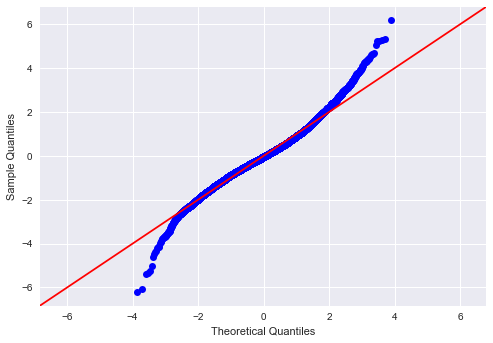

In [396]:

import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

#violations near the tails but otherwise okay 

In [397]:
from sklearn.model_selection import train_test_split
y = df_preprocessed[['price']]
X = df_preprocessed.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [398]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [399]:
#Look at the residuals and calculate the MSE for training and test sets:  
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error
from math import sqrt
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
rms = sqrt(mean_squared_error(y_test, y_hat_test))
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
print('RMS:', rms )

Train Mean Squarred Error: 0.19070369633001238
Test Mean Squarred Error: 0.1951818338112678
RMS: 0.4417938815910286


In [400]:
#cross-validation
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring=mse)
cv_10_results.mean()

0.19562801348648434

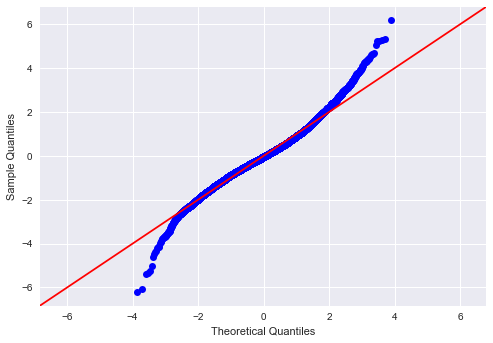

In [401]:
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

#violations near the tails but otherwise okay 

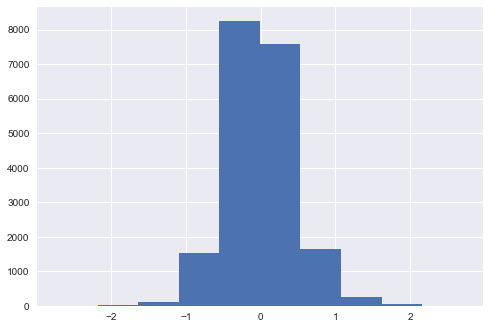

In [402]:

ax = plt.hist(model.resid)


In [404]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_hat_test)*100
print(mape)


33.07748031405527


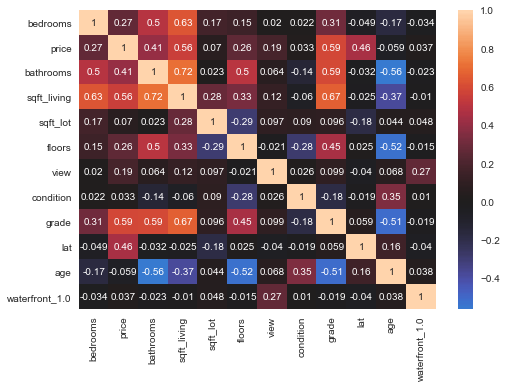

In [423]:
feats2 = ['bedrooms', 'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
        'condition', 'grade', 'lat', 'age', 'waterfront_1.0']
corr = df_preprocessed[feats2].corr()
sns.heatmap(corr, center=0, annot=True);

# high correlation between price and sqft_living, grade, and latitude, bathrooms

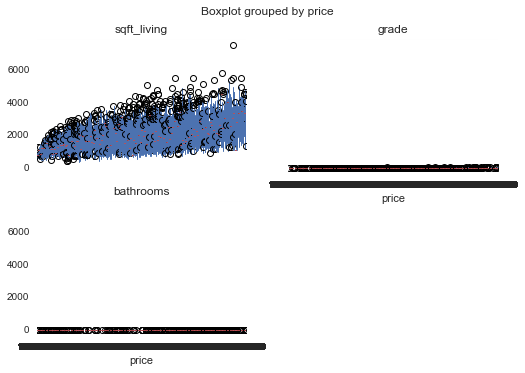

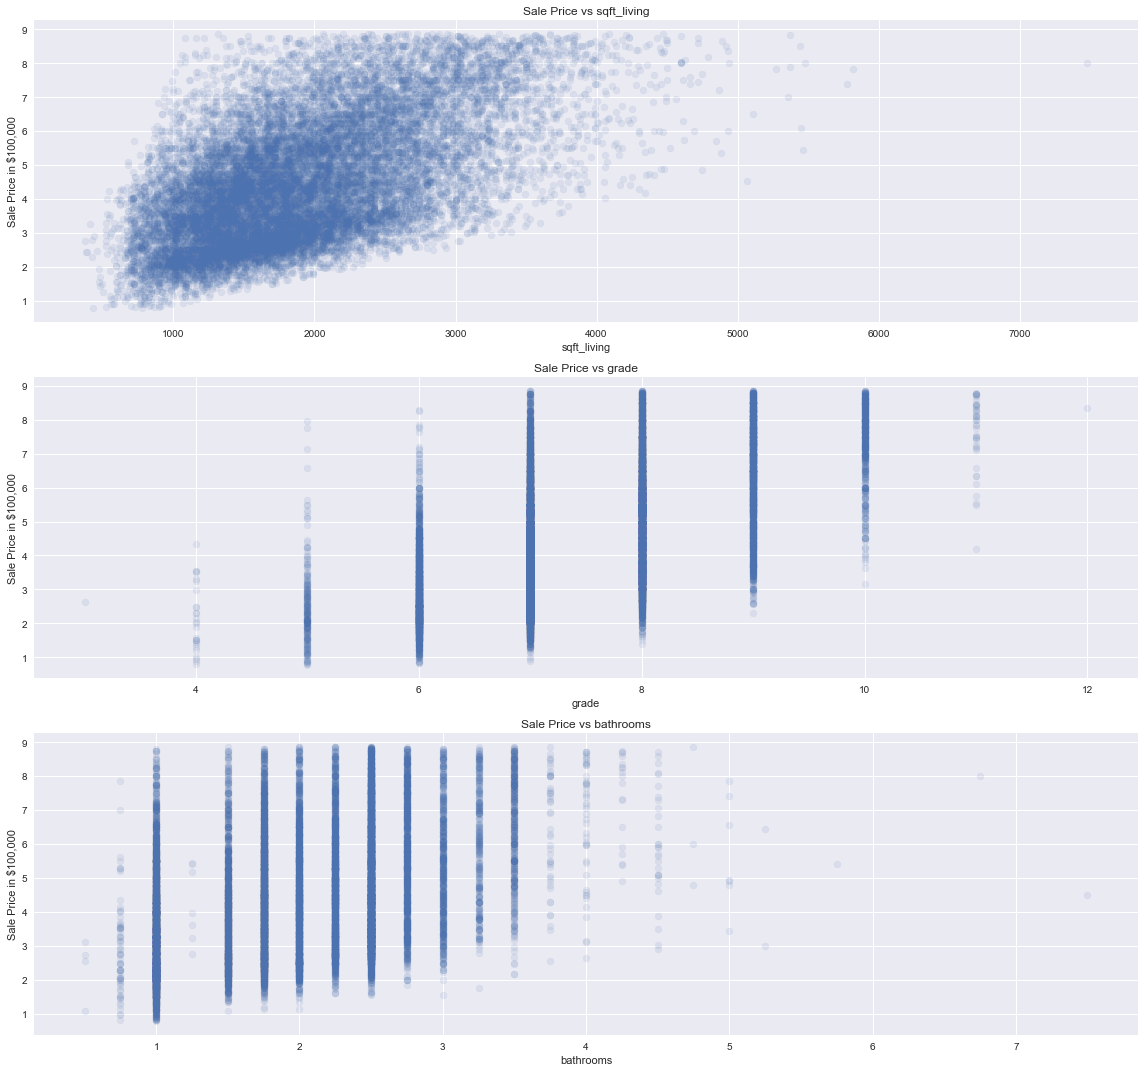

In [431]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,15), sharey=True)

highcorr = ['sqft_living', 'grade', 'bathrooms']
for ax, column in zip(axes.flatten(), df[highcorr].columns):
    ax.scatter(df2[column], df2['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout() 

# Feature Importance 

importance = model.params
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [405]:

##removing outliers due to the errors 
#Finding a cutoff point
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df_preprocessed['price'].quantile(q=q)))

0.9 percentile: 1.5039327952538437
0.91 percentile: 1.5714828789119426
0.92 percentile: 1.6559204834845662
0.93 percentile: 1.7262851539617527
0.94 percentile: 1.8107227585343764
0.95 percentile: 1.8884053547411859
0.96 percentile: 1.9757721561081731
0.97 percentile: 2.0927330994596627
0.98 percentile: 2.190691979111183


In [406]:
subset = df_preprocessed[df_preprocessed['price'] < 2.0]
print('Percent removed:',(len(df_preprocessed) - len(subset))/len(df_preprocessed))

##got to change eit so it's subset insteaed of df_preprocessed 

Percent removed: 0.03781836892204785


In [409]:
X200 = subset.drop(['price'], axis=1)
X_fin200 = X200[result2]
X_with_intercept200 = sm.add_constant(X_fin200)
model200 = sm.OLS(subset['price'], X_with_intercept200).fit()
model200.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     989.6
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:16:33   Log-Likelihood:                -9966.2
No. Observations:               18700   AIC:                         2.008e+04
Df Residuals:                   18625   BIC:                         2.067e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6592      0.023    -28.263      0.000      -0.705      -0.613
bedrooms          -0.0274      0.004     -6.635      0.000      -0.036      -0.019
bathrooms          0.0405      0.005      7.712      0.000       0.030       0.051
sqft_living        0.3363      0.006     55.746      0.000       0.324       0.348
sqft_lot           0.1373      0.005     30.190      0.000       0.128       0.146
floors             0.0345      0.004      8.063      0.000       0.026       0.043
view               0.0857      0.003     25.002      0.000       0.079       0.092
condition          0.0598      0.003     17.659      0.000       0.053       0.066
grade              0.2402      0.005     48.368      0.000       0.230       0.250
lat                0.1707      0.016     10.720      0.000       0.139       0.202
long              -0.0473      0.014     -3.384      0.001      -0.075      -0.020
age                0.0587      0.005     11.137      0.000       0.048       0.069
zipcode_98002      0.0657      0.032      2.078      0.038       0.004       0.128
zipcode_98004      2.0905      0.058     35.973      0.000       1.977       2.204
zipcode_98005      1.4368      0.052     27.718      0.000       1.335       1.538
zipcode_98006      1.1305      0.036     31.005      0.000       1.059       1.202
zipcode_98007      1.0530      0.050     21.185      0.000       0.956       1.150
zipcode_98008      1.0464      0.043     24.489      0.000       0.963       1.130
zipcode_98010      0.5817      0.049     11.879      0.000       0.486       0.678
zipcode_98011      0.3862      0.054      7.127      0.000       0.280       0.492
zipcode_98014      0.2978      0.069      4.345      0.000       0.163       0.432
zipcode_98019      0.1876      0.063      2.995      0.003       0.065       0.310
zipcode_98022      0.2375      0.040      5.949      0.000       0.159       0.316
zipcode_98023     -0.1053      0.025     -4.245      0.000      -0.154      -0.057
zipcode_98024      0.6097      0.067      9.158      0.000       0.479       0.740
zipcode_98027      0.9122      0.037     24.455      0.000       0.839       0.985
zipcode_98028      0.2733      0.051      5.401      0.000       0.174       0.372
zipcode_98029      1.1530      0.044     26.390      0.000       1.067       1.239
zipcode_98032     -0.1252      0.038     -3.282      0.001      -0.200      -0.050
zipcode_98033      1.2098      0.045     26.806      0.000       1.121       1.298
zipcode_98034      0.5427      0.045     12.005      0.000       0.454       0.631
zipcode_98038      0.3081      0.029     10.714      0.000       0.252       0.365
zipcode_98039      2.7483      0.414      6.633      0.000       1.936       3.560
zipcode_98040      1.8456      0.056     32.828      0.000       1.735       1.956
zipcode_9804

In [410]:
y200 = subset[['price']]
X200 = subset.drop(['price'], axis=1)
X_train200, X_test200, y_train200, y_test200 = train_test_split(X200, y200, test_size=0.2, random_state=42)


In [411]:
linreg200 = LinearRegression()
linreg200.fit(X_train200, y_train200)


LinearRegression()

In [412]:
y_hat_train200 = linreg200.predict(X_train200)
y_hat_test200 = linreg200.predict(X_test200)
train_residuals200 = y_hat_train200 - y_train200
test_residuals200 = y_hat_test200 - y_test200



In [415]:
train_mse200 = mean_squared_error(y_train200, y_hat_train200)
test_mse200 = mean_squared_error(y_test200, y_hat_test200)
rms200 = sqrt(mean_squared_error(y_test200, y_hat_test200))

print('Train Mean Squarred Error:', train_mse200)
print('Test Mean Squarred Error:', test_mse200)
print('RMS:', rms200 )

mape200 = mean_absolute_error(y_test200, y_hat_test200)*100
print(mape200)



Train Mean Squarred Error: 0.16912047561495272
Test Mean Squarred Error: 0.17419374836284973
RMS: 0.4173652457534644
31.31609617998383


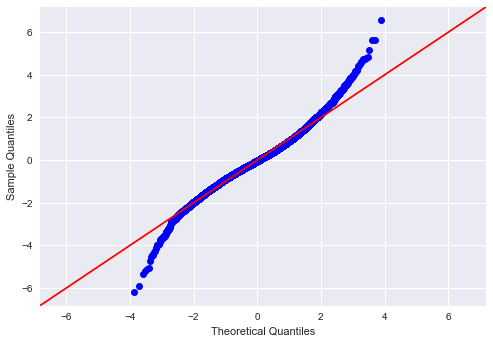

In [416]:
fig = sm.graphics.qqplot(model200.resid, dist=stats.norm, line='45', fit=True)


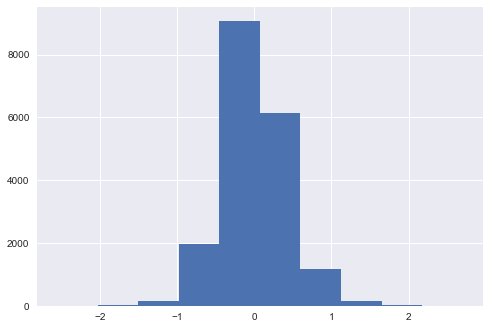

In [417]:
ax = plt.hist(model200.resid)


I chose the first model above as my model, rather than the refined version (model200) that was formed from removing outliers.  I made this decisiono because the r2 value was higher in model, and the mean of the residuals was closer to 0.  R2 describes how strong the relationship is ibetween my momdel and the dependent variables. This model has a R2 value of .808, showing good fit. 

The mean of the residuals graph is centered around 0, showing that the model does not have systematic bias. 





Train Mean Squarred Error: 0.16912047561495272
Test Mean Squarred Error: 0.17419374836284973
RMS: 0.4173652457534644
31.31609617998383

In [246]:
X12 = df_preprocessed.drop(['price'], axis=1)
X_fin12 = X12[selected_columns]
X_with_intercept12 = sm.add_constant(X_fin22)
model22 = sm.OLS(df_preprocessed['price'], X_with_intercept12).fit()
model22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1240.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:15:56   Log-Likelihood:                -14882.
No. Observations:               19268   AIC:                         2.985e+04
Df Residuals:                   19226   BIC:                         3.018e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6011      0.006   -108.645      0.000      -0.612      -0.590
sqft_living           0.5744      0.004    142.757      0.000       0.566       0.582
waterfront            1.2597      0.086     14.682      0.000       1.092       1.428
['zipcode']_98004     2.3300      0.055     42.625      0.000       2.223       2.437
['zipcode']_98005     1.6406      0.048     34.011      0.000       1.546       1.735
['zipcode']_98006     1.2870      0.030     43.147      0.000       1.229       1.345
['zipcode']_98007     1.1452      0.048     24.052      0.000       1.052       1.239
['zipcode']_98008     1.0979      0.033     33.027      0.000       1.033       1.163
['zipcode']_98024     0.6063      0.063      9.566      0.000       0.482       0.731
['zipcode']_98027     0.8496      0.028     30.550      0.000       0.795       0.904
['zipcode']_98029     1.0983      0.031     35.590      0.000       1.038       1.159
['zipcode']_98033     1.4351      0.030     47.665      0.000       1.376       1.494
['zipcode']_98034     0.6819      0.024     28.539      0.000       0.635       0.729
['zipcode']_98039     3.1827      0.303     10.510      0.000       2.589       3.776
['zipcode']_98040     2.0804      0.053     39.240      0.000       1.976       2.184
['zipcode']_98045     0.3438      0.037      9.413      0.000       0.272       0.415
['zipcode']_98052     1.2050      0.024     50.856      0.000       1.159       1.251
['zipcode']_98053     1.0988      0.029     37.805      0.000       1.042       1.156
['zipcode']_98065     0.4538      0.031     14.518      0.000       0.393       0.515
['zipcode']_98070     0.5461      0.051     10.608      0.000       0.445       0.647
['zipcode']_98072     0.7448      0.034     21.992      0.000       0.678       0.811
['zipcode']_98074     1.0942      0.028     39.571      0.000       1.040       1.148
['zipcode']_98075     1.2628      0.032     39.160      0.000       1.200       1.326
['zipcode']_98077     0.9508      0.041     23.055      0.000       0.870       1.032
['zipcode']_98102     1.8013      0.063     28.617      0.000       1.678       1.925
['zipcode']_98103     1.4264      0.023     62.242      0.000       1.381       1.471
['zipcode']_98105     1.6766      0.043     39.322      0.000       1.593       1.760
['zipcode']_98107     1.4652      0.033     43.824      0.000       1.400       1.531
['zipcode']_98109     1.9190      0.062     30.915      0.000       1.797       2.041
['zipcode']_98112     1.8549      0.047     39.881      0.000       1.764       1.946
['zipcode']_98115     1.3843      0.024     58.243      0.000       1.338       1.431
['zipcode']_98116     1.3372      0.031     42.773      0.000       1.276       1.398
['zipcode']_98117     1.3546      0.024     56.550      0.000       1.308

In [188]:
df_preprocessed3=df2.drop(["id"], axis=1)
df_preprocessed3=df2.drop(["date"], axis=1)

In [189]:
##Model 3 --- turn grade and condition into categories

#create dummy variables for the categorical features

#dummies = pd.get_dummies(df[categoricals], prefix=categoricals, drop_first=True
categoricals3 = ['zipcode', 'grade', 'condition', 'waterfront']
zipcode_dummies = pd.get_dummies(df2['zipcode'], prefix = 'zipcode', drop_first=True)
grade_dummies = pd.get_dummies(df2['grade'], prefix = 'grade', drop_first=True)
condition_dummies = pd.get_dummies(df2['condition'], prefix = 'condition', drop_first=True)
waterfront_dummies = pd.get_dummies(df2['waterfront'], prefix = 'waterfront', drop_first=True)


df_preprocessed3 = df2.drop(categoricals3, axis=1)
#df_preprocessed3=df2.drop(["id"], axis=1)
#df_preprocessed3=df2.drop(["date"], axis=1)


df_preprocessed3 = pd.concat([df_preprocessed3, zipcode_dummies, grade_dummies, condition_dummies, waterfront_dummies], axis=1)
df_preprocessed3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,...,grade_8,grade_9,grade_10,grade_11,grade_12,condition_2,condition_3,condition_4,condition_5,waterfront_1.0
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0.0,1180,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0.0,2170,...,0,0,0,0,0,0,1,0,0,0
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0.0,770,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0.0,1050,...,0,0,0,0,0,0,0,0,1,0
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0.0,1680,...,1,0,0,0,0,0,1,0,0,0


In [190]:
predictors3 = df_preprocessed3.drop('price', axis=1)
predictors3_int = sm.add_constant(predictors3)
model3 = sm.OLS(df_preprocessed3['price'],predictors3_int).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     929.4
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:26:41   Log-Likelihood:            -2.4339e+05
No. Observations:               19268   AIC:                         4.870e+05
Df Residuals:                   19169   BIC:                         4.878e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.365e+07   3.78e+06    -14.181      0.000   -6.11e+07   -4.62e+07
id              1.813e-08   1.94e-07      0.093      0.926   -3.63e-07    3.99e-07
date            1.291e+04    770.355     16.755      0.000    1.14e+04    1.44e+04
bedrooms       -2401.4719    829.800     -2.894      0.004   -4027.953    -774.991
bathrooms       1.391e+04   1349.015     10.309      0.000    1.13e+04    1.66e+04
sqft_living       50.7629      7.714      6.581      0.000      35.644      65.882
sqft_lot           0.2645      0.020     13.328      0.000       0.226       0.303
floors         -1.449e+04   1598.002     -9.069      0.000   -1.76e+04   -1.14e+04
view            2.462e+04   1020.786     24.121      0.000    2.26e+04    2.66e+04
sqft_above        47.9016      7.718      6.207      0.000      32.774      63.029
sqft_basement      9.4254      7.631      1.235      0.217      -5.532      24.383
yr_built        6225.5831    385.605     16.145      0.000    5469.764    6981.402
lat              1.82e+05    3.1e+04      5.877      0.000    1.21e+05    2.43e+05
long           -5.287e+04   2.19e+04     -2.410      0.016   -9.59e+04   -9877.302
sqft_living15     33.5492      1.596     21.017      0.000      30.420      36.678
sqft_lot15         0.0615      0.031      1.973      0.048       0.000       0.122
age             6681.5856    385.406     17.336      0.000    5926.156    7437.015
zipcode_98002   5078.1005   6735.806      0.754      0.451   -8124.670    1.83e+04
zipcode_98003  -6799.4701   6030.191     -1.128      0.260   -1.86e+04    5020.233
zipcode_98004   3.988e+05    1.3e+04     30.755      0.000    3.73e+05    4.24e+05
zipcode_98005   2.664e+05   1.24e+04     21.503      0.000    2.42e+05    2.91e+05
zipcode_98006   2.127e+05   1.02e+04     20.950      0.000    1.93e+05    2.33e+05
zipcode_98007   1.951e+05   1.26e+04     15.506      0.000     1.7e+05     2.2e+05
zipcode_98008   1.892e+05   1.19e+04     15.864      0.000    1.66e+05    2.13e+05
zipcode_98010   9.381e+04   1.04e+04      9.002      0.000    7.34e+04    1.14e+05
zipcode_98011     6.9e+04   1.55e+04      4.456      0.000    3.87e+04    9.94e+04
zipcode_98014   6.103e+04    1.7e+04      3.597      0.000    2.78e+04    9.43e+04
zipcode_98019   3.829e+04   1.67e+04      2.288      0.022    5490.460    7.11e+04
zipcode_98022   3.018e+04   9103.735      3.315      0.001    1.23e+04     4.8e+04
zipcode_98023  -2.527e+04   5570.812     -4.535      0.000   -3.62e+04   -1.43e+04
zipcode_98024   1.131e+05   1.51e+04      7.506      0.000    8.36e+04    1.43e+05
zipcode_98027   1.633e+05   1.01e+04     16.152      0.000    1.44e+05    1.83e+05
zipcode_98028   5.448e+04   1.51e+04      3.613      0.000    2.49e+04     8.4e+04
zipcode_98029    1.97e+05   1.16e+04     16.990      0.000    1.74e+05     2.2e+05
zipcode_9803

In [166]:
model3.pvalues

const             2.043081e-45
id                9.256198e-01
date              1.455211e-62
bedrooms          3.807524e-03
bathrooms         7.451391e-25
                      ...     
condition_2       1.332262e-04
condition_3       3.101805e-12
condition_4       1.476631e-16
condition_5       1.379438e-24
waterfront_1.0    1.094625e-32
Length: 100, dtype: float64

In [200]:
result3 = []
for column in predictors3_int:
    if model3.pvalues[column]<0.05:
        result3.append(column)
result3.remove('const')
    

In [159]:
#perfrom stepwise
#result3 = stepwise_selection(predictors3, df_preprocessed3['price'], verbose=True)
#print('resulting features:')
#print(result3)

In [201]:
#Build the final model again in Statsmodel
X3 = df_preprocessed3.drop(['price'], axis=1)
X_fin3 = X3[result3]
X_with_intercept3 = sm.add_constant(X_fin3)
model35 = sm.OLS(df_preprocessed3['price'], X_with_intercept3).fit()
model35.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1073.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:34:06   Log-Likelihood:            -2.4427e+05
No. Observations:               19268   AIC:                         4.887e+05
Df Residuals:                   19191   BIC:                         4.893e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.683e+07   3.15e+06    -18.053      0.000    -6.3e+07   -5.07e+07
date            1.265e+04    805.331     15.711      0.000    1.11e+04    1.42e+04
bedrooms       -7225.6705    850.590     -8.495      0.000   -8892.902   -5558.439
bathrooms        1.59e+04   1399.325     11.361      0.000    1.32e+04    1.86e+04
sqft_living       72.7297      1.994     36.479      0.000      68.822      76.638
sqft_lot           0.2768      0.021     13.362      0.000       0.236       0.317
floors         -1.222e+04   1656.307     -7.377      0.000   -1.55e+04   -8971.386
view            2.745e+04   1059.184     25.915      0.000    2.54e+04    2.95e+04
sqft_above        53.2211      2.017     26.390      0.000      49.268      57.174
yr_built        6278.4135    403.159     15.573      0.000    5488.187    7068.640
lat             2.413e+05   1.73e+04     13.917      0.000    2.07e+05    2.75e+05
long           -5.813e+04   1.52e+04     -3.821      0.000    -8.8e+04   -2.83e+04
sqft_living15     50.0174      1.608     31.103      0.000      46.865      53.169
sqft_lot15         0.0537      0.032      1.658      0.097      -0.010       0.117
age             6378.7060    402.972     15.829      0.000    5588.846    7168.566
zipcode_98004   3.939e+05   9156.903     43.011      0.000    3.76e+05    4.12e+05
zipcode_98005   2.709e+05   8336.137     32.496      0.000    2.55e+05    2.87e+05
zipcode_98006   2.203e+05   5742.422     38.365      0.000    2.09e+05    2.32e+05
zipcode_98007   1.964e+05   8342.452     23.542      0.000     1.8e+05    2.13e+05
zipcode_98008   1.853e+05   6801.584     27.239      0.000    1.72e+05    1.99e+05
zipcode_98010   9.004e+04   8691.006     10.361      0.000     7.3e+04    1.07e+05
zipcode_98011   4.695e+04   8734.232      5.376      0.000    2.98e+04    6.41e+04
zipcode_98014   3.844e+04   1.09e+04      3.517      0.000     1.7e+04    5.99e+04
zipcode_98019   4659.0858   9774.279      0.477      0.634   -1.45e+04    2.38e+04
zipcode_98022   3.579e+04   6809.655      5.256      0.000    2.24e+04    4.91e+04
zipcode_98023  -1.708e+04   4584.133     -3.727      0.000   -2.61e+04   -8097.966
zipcode_98024   1.002e+05   1.13e+04      8.888      0.000    7.81e+04    1.22e+05
zipcode_98027   1.611e+05   5776.074     27.891      0.000     1.5e+05    1.72e+05
zipcode_98028   3.275e+04   8076.976      4.055      0.000    1.69e+04    4.86e+04
zipcode_98029   2.022e+05   6755.050     29.939      0.000    1.89e+05    2.15e+05
zipcode_98032  -1.479e+04   7193.127     -2.057      0.040   -2.89e+04    -693.936
zipcode_98033   2.181e+05   7045.797     30.958      0.000    2.04e+05    2.32e+05
zipcode_98034   9.048e+04   6991.745     12.941      0.000    7.68e+04    1.04e+05
zipcode_98038   3.136e+04   4514.040      6.948      0.000    2.25e+04    4.02e+04
zipcode_9803

In [202]:
y3 = df_preprocessed3[['price']]
X3 = df_preprocessed3.drop(['price'], axis=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [203]:
linreg3 = LinearRegression()
linreg3.fit(X_train3, y_train3)

y_hat_train3 = linreg3.predict(X_train3)
y_hat_test3 = linreg3.predict(X_test3)

In [207]:
train_residuals3 = y_hat_train3 - y_train3
test_residuals3 = y_hat_test3 - y_test3

train_mse3 = mean_squared_error(y_train3, y_hat_train3)
test_mse3 = mean_squared_error(y_test3, y_hat_test3)
print('Train Mean Squarred Error:', train_mse3)
print('Test Mean Squarred Error:', test_mse3)

Train Mean Squarred Error: 5499050138.892971
Test Mean Squarred Error: 5485650169.78322


In [208]:
#cross-validation


mse3 = make_scorer(mean_squared_error)

cv_10_results = cross_val_score(linreg3, X3, y3, cv=10, scoring=mse)
cv_10_results.mean()

5592027802.855155

In [165]:
#Checking for Multicollinearity 

#x_cols3 = list(X_fin3.columns)